# HOW TO RETRIEVE AND USE HISTORIC VOLCANIC ACTIVITY DATA

The data are available through the [GeoNet GitHub data repository](https://github.com/GeoNet/data/tree/main/historic-volcanic-activity), and more information on the dataset can be found there.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data retrieval and basic graphing
### &nbsp;1. Basic Timeseries Plot
### &nbsp;2. Locations of Activity

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt
import matplotlib

#for datetime functionality
import datetime as dt
from dateutil import tz 

import warnings
warnings.simplefilter(action='ignore')

## &nbsp;2. Basic data retrieval and graphing

We will work with data from Ruapehu for a basic timeseries plot, and from Tongairo to show how you can analyse different eruption locations.

The Tongairo dataset was used for a [GeoNet data blog](https://www.geonet.org.nz/news/2DMtHEzmma5EqfMWmMvhjy), and that [blog's notebook is also available](https://github.com/GeoNet/data-tutorials/tree/main/Data_Blog/blog_05_visualize_eruption_catalogue), and contains additional examples. Please note that notebooks used to for data blogs are not maintained so there is no guarantee code will run.

### &nbsp;1. Basic Timeseries Plot

Ruapehu activity is plotted as a vertical lines, with the height of the line according to the `Activity Scale`. We show a time period from 1960 to now.

In [2]:
url = 'https://raw.githubusercontent.com/GeoNet/data/refs/heads/main/historic-volcanic-activity/historic_eruptive_activity_ruapehu.csv'

In [3]:
hist = pd.read_csv(url, parse_dates=['Date LocalTime'], date_format='ISO8601')

In [4]:
hist.tail()

,Date LocalTime,Date Comment,Activity Description,Activity Scale,Additional Details,References
526,1997-11-01,NaN,Minor phreatic eruptions,1,Confined to basin,NaN
527,1998-11-08,NaN,Small phreatic eruptions,1,Confined to basin,NaN
528,2006-10-04,NaN,Minor hydrothermal eruption,2,Confined to basin,NaN
529,2007-09-25,NaN,Moderate hydrothermal eruptions with lahars do...,4,Confined to summit plateau and Whangaehu valle...,NaN
530,2009-07-13,NaN,Phreatic activity,2,Small snow slurry lahars in upper Whangaehu,NaN


Text(0, 0.5, 'Activity scale value')

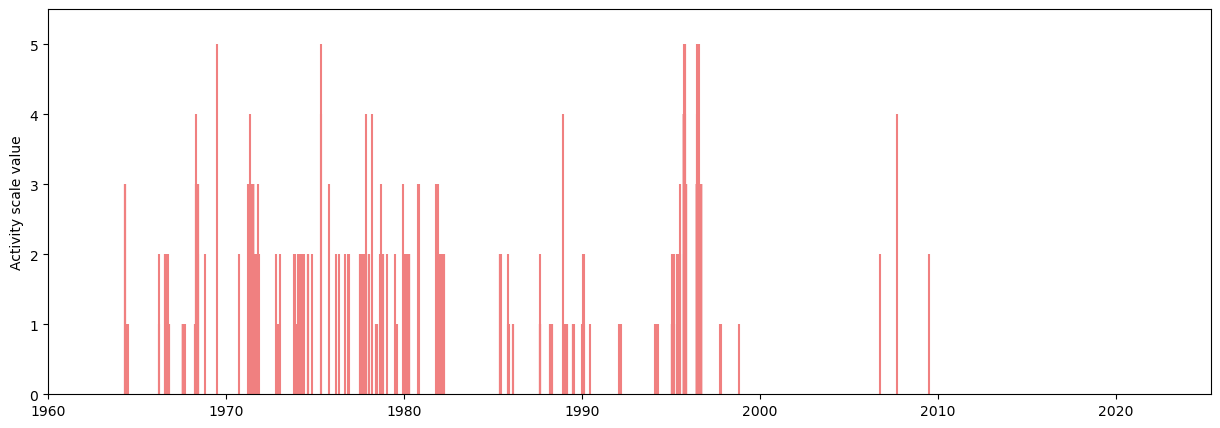

In [5]:
fig,ax = plt.subplots(1,1,figsize=(15,5), sharex=True)

ax.set_xlim(left=dt.datetime(1960,1,1), right=dt.datetime.now())

ax.vlines(hist['Date LocalTime'], ymin=0, ymax=hist['Activity Scale'], color='lightcoral')
ax.set_ylim(0,5.5)
ax.set_ylabel('Activity scale value')

### &nbsp;2. Locations of activity

We calculate and graph a histogram of locations of reported Tongariro activity.

In [6]:
url = 'https://raw.githubusercontent.com/GeoNet/data/main/historic-volcanic-activity/historic_eruptive_activity_tongariro.csv'

In [7]:
tong = pd.read_csv(url, index_col = 'Date LocalTime', parse_dates=True)
#keep only rows with a valid index
tong = tong.iloc[tong.index.notnull()]

In [8]:
tong.head()

,Date Comment,Location,Activity Description,Certainty,References
Date LocalTime,,,,,
1846-05-15,May 1846,Ketetahi,An account of Ketetahi forming at the time of ...,Possible,Hawke's Bay Herald 7.4.1890
1848-10-15,Oct 1848,unknown,Observation of an ash cloud and suggestion it ...,Discounted,Wellington Independent 25.10.1848
1848-11-15,Nov 1848,Tongariro,Report of eruptive activity at Tongariro. Cons...,Discounted,New Zealander 15.11.1848
1854-07-01,1854,Red Crater or Te Maari,Assumed to be based on misreporting the date o...,NaN,Newspapers quoting Hochstetter lecture (see be...
1855-01-23,Jan 1855,Red Crater or Te Maari,Ash eruption at the time of the Wellington ear...,Possible,Hochstetter (1864; cited in Fleming 1959) Kerr...


#### Number of occurrences of each activity location

Additional examples are available in a [notebook](https://github.com/GeoNet/data-tutorials/blob/main/Data_Blog/blog_05_visualize_eruption_catalogue/visualize_eruption_catalogue.ipynb) used to prepare material for a data blog on [visualising historic volcanic activity at Tongariro](https://www.geonet.org.nz/news/2DMtHEzmma5EqfMWmMvhjy).

In [9]:
#count number of occurrences of each location
location = pd.DataFrame(tong['Location'].value_counts())

#move the row for `unknown` location to the end, as it looks tidier
move = location.loc['unknown']
location.drop('unknown', inplace=True)
location = pd.concat([location, pd.DataFrame([move])])
location

,count
Te Maari,55
Red Crater,27
Upper Te Maari,13
Ketetahi,8
Ngauruhoe,5
South Crater,4
Red Crater or Te Maari,2
(Upper?) Te Maari,2
Tongariro,1
Lower Te Maari,1


Text(0, 0.5, 'Number of occurrences')

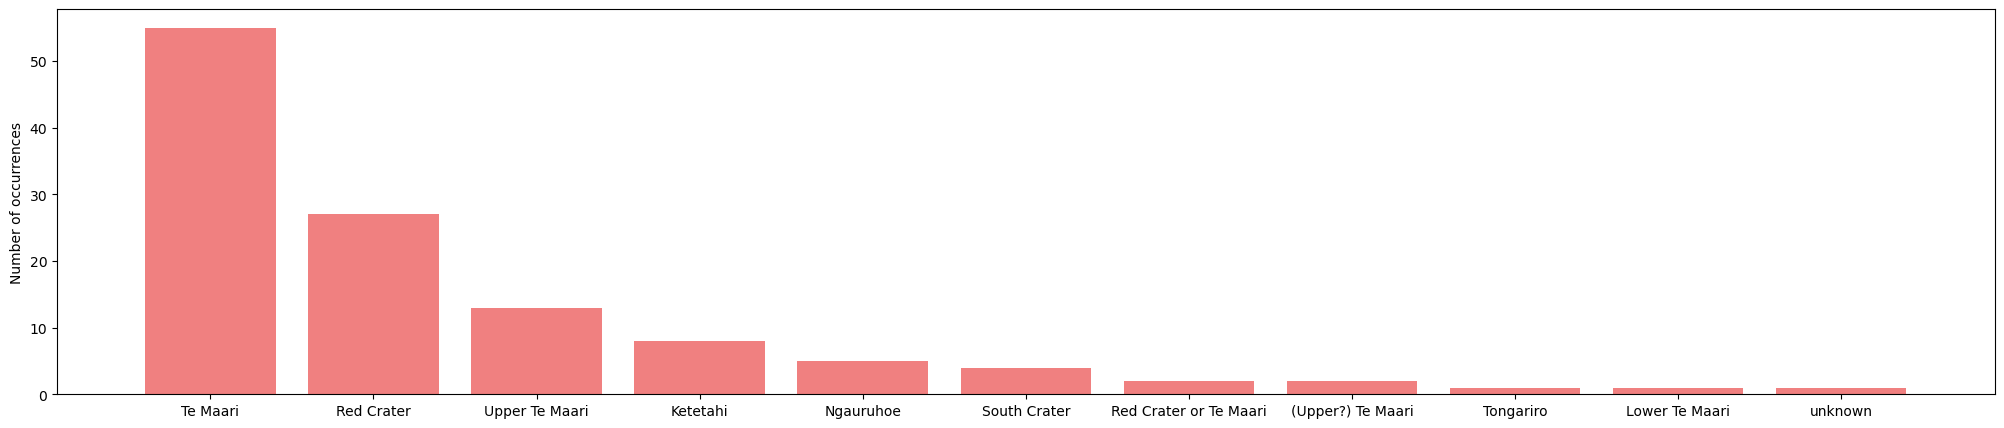

In [10]:
fig,ax = plt.subplots(1,1, figsize=(25,5))
ax.bar(location.index, location['count'], color='lightcoral')
ax.set_ylabel('Number of occurrences')